#### Python Homework 7
#### Uniquename: Qifan
#### Email: qifan@umich.edu
#### It took me approximately 10 hours to complete this.

In [106]:
from bs4 import BeautifulSoup
import urllib.request
import itertools as it
import re
import matplotlib.pyplot as plt
import sqlite3
import string

### Problem 1

In [108]:
words=urllib.request.urlopen("http://www.greenteapress.com/thinkpython/code/words.txt")
rwords=words.read().decode("ascii")
word_list=re.findall(r"[a-zA-Z]+",rwords)
# How many words are in the document?
word_list[3]

'aahing'

In [110]:
len(word_list)

113809

##### 113809 words are in the list.
##### Looking at the data, I just feel some words are not typical English (like aa, aah,aas...) and all letters are in their lower case.

In [111]:
# What about words that contain both 4 and 3?
c,vowel_words=0,list()
three_consecutive_vowels=re.compile(r"(^|[^aeiou]+)[aeiou]{3}([^aeiou]+|$)")
for i in word_list:
    if not len(re.findall(three_consecutive_vowels,i))==0:
        vowel_words.append(i);c+=1
len(vowel_words)

1326

##### 1326 words that contain exactly three consecutive vowels

In [176]:
gadsby=re.compile(r"^[^e]+$")
c,gadsby_words=0,list()
for i in word_list:
    if not len(re.findall(gadsby,i))==0:
        gadsby_words.append(i);c+=1
c

37641

##### 37641 gasdby words

In [33]:
consonant_consonant=re.compile(r"^[^aeiouy][aeiouy]*[^aeiouy]$")    
c,consonant_words=0,list()
for i in word_list:
    if not len(re.findall(consonant_consonant,i))==0:
        consonant_words.append(i);c+=1
c

1230

##### 1230 words that begin and end with a consonant and have no consonants in between 

##### For  single characters, I don't count them out of the fact there is just one letter in the word (It just makes no sense saying that first two characters are the reverse of the last two ones). Well for words with length 2 or 3, they may belong to the list. For example "aa" and "aba" are in the list.

##### 886 words are in the list with this property.

In [207]:
bookends=re.compile(r"^([a-z])([a-z])[a-z]*\2\1$|^([a-z])[a-z]\3$|^([a-z])\4$")
c,bookends_words=0,list()
for i in word_list:
    if not len(re.findall(bookends,i))==0:
        bookends_words.append(i);c+=1
c

886

### Problem 3

In [208]:
city_harbin=urllib.request.urlopen("https://en.wikipedia.org/wiki/Harbin")
harbin=city_harbin.read().decode("UTF-8")
city_harbin_parsed=BeautifulSoup(harbin,"html.parser")
#city_harbin_parsed=city_harbin_parsed.prettify()
#city_harbin_parsed

In [221]:
for i in city_harbin_parsed.find_all("table"):
    if i.th and "Climate data" in i.th.get_text(): 
        climate_table=i; break
        
childs=climate_table.children
print(climate_table.prettify()) 


<table class="wikitable collapsible" style="width:100%; text-align:center; line-height: 1.2em; margin:auto;">
 <tbody>
  <tr>
   <th colspan="14">
    Climate data for Harbin (1981–2010 normals, extremes 1961–2000)
   </th>
  </tr>
  <tr>
   <th scope="row">
    Month
   </th>
   <th scope="col">
    Jan
   </th>
   <th scope="col">
    Feb
   </th>
   <th scope="col">
    Mar
   </th>
   <th scope="col">
    Apr
   </th>
   <th scope="col">
    May
   </th>
   <th scope="col">
    Jun
   </th>
   <th scope="col">
    Jul
   </th>
   <th scope="col">
    Aug
   </th>
   <th scope="col">
    Sep
   </th>
   <th scope="col">
    Oct
   </th>
   <th scope="col">
    Nov
   </th>
   <th scope="col">
    Dec
   </th>
   <th scope="col" style="border-left-width:medium">
    Year
   </th>
  </tr>
  <tr style="text-align: center;">
   <th scope="row" style="height: 16px;">
    Record high °C (°F)
   </th>
   <td style="background: #FDFDFF; color:#000000;">
    4.2
    <br/>
    (39.6)
   </td>

##### The table has one child tbody and tbody's child is tr. 

In [114]:
def retrieve_climate_table(url):
    try: web=urllib.request.urlopen(url)
    except: 
        raise ValueError("We cannot open the given url")
    web_data=web.read().decode("UTF-8")
    web_data=BeautifulSoup(web_data,"html.parser")
    for i in web_data.find_all("table"):
        if "Climate data" in i.get_text(): return i
        if i.th and "Climate data" in i.th.get_text():
            return i
    return None
print(retrieve_climate_table("https://en.wikipedia.org/wiki/Hangzhou").prettify())

<table class="wikitable collapsible collapsed" style="width:auto; text-align:center; line-height: 1.2em; margin:auto;">
 <tbody>
  <tr>
   <th colspan="14">
    Climate data for Hangzhou (1981–2010 normals, extremes 1951–present)
   </th>
  </tr>
  <tr>
   <th scope="row">
    Month
   </th>
   <th scope="col">
    Jan
   </th>
   <th scope="col">
    Feb
   </th>
   <th scope="col">
    Mar
   </th>
   <th scope="col">
    Apr
   </th>
   <th scope="col">
    May
   </th>
   <th scope="col">
    Jun
   </th>
   <th scope="col">
    Jul
   </th>
   <th scope="col">
    Aug
   </th>
   <th scope="col">
    Sep
   </th>
   <th scope="col">
    Oct
   </th>
   <th scope="col">
    Nov
   </th>
   <th scope="col">
    Dec
   </th>
   <th scope="col" style="border-left-width:medium">
    Year
   </th>
  </tr>
  <tr style="text-align: center;">
   <th scope="row" style="height: 16px;">
    Record high °C (°F)
   </th>
   <td style="background: #FF6E00; color:#000000;">
    25.4
    <br/>
   

In [116]:
## Encoder??Decoder
def list_climate_table_row_names(url):
    row_list=list()
    if retrieve_climate_table(url): climat_table=retrieve_climate_table(url)
    else: return None
    for i in climat_table.find_all("th"):
        try: 
            i["scope"]
            if i["scope"]=="row": row_list.append(i.get_text().strip())
        except: KeyError
    return row_list   
list_climate_table_row_names("https://en.wikipedia.org/wiki/Hangzhou")

['Month',
 'Record high °C (°F)',
 'Mean maximum °C (°F)',
 'Average high °C (°F)',
 'Daily mean °C (°F)',
 'Average low °C (°F)',
 'Mean minimum °C (°F)',
 'Record low °C (°F)',
 'Average precipitation mm (inches)',
 'Average precipitation days (≥ 0.1 mm)',
 'Average relative humidity (%)',
 'Mean monthly sunshine hours']

In [119]:
def get_data(url,rowname):
    data_list,s=list(),""
    if list_climate_table_row_names(url): row_names=list_climate_table_row_names(url)
    else: None
    climate_table=retrieve_climate_table(url)
    # Find the Position
    for i in range(len(row_names)): 
        if i==row_names[i]: start=row_names[i]; end=row_names[i+1]
    for j in climate_table.find_all("th"):
        try: 
            j["scope"]
            if j["scope"]=="row" and rowname in j.get_text().strip():s=j;break
        except: KeyError
    if s=="": print("The rowname does not exist!!!")
    while True:
        s=s.next_sibling;
        if s==None: break
        if s.name=="tr": break
        if s.name=="td":
            regex=re.findall(r"([0-9]+[.]{0,1}[0-9]*)[(]([0-9]+[.]{0,1}[0-9]*)[)]",s.get_text().strip())
            if not len(regex)==0: 
                a,b=regex[0]
                data_list.append((float(a),float(b)))
            else: 
                try: float(s.get_text().strip());data_list.append(float(s.get_text().strip()))
                except: ValueError
    return data_list
list_climate_table_row_names("https://en.wikipedia.org/wiki/Zhumadian")
get_data("https://en.wikipedia.org/wiki/Nanyang,_Henan","Average precipitation mm (inches)")

[(13.7, 0.54),
 (16.2, 0.64),
 (34.7, 1.37),
 (48.8, 1.92),
 (73.1, 2.88),
 (123.9, 4.88),
 (177.8, 7.0),
 (114.3, 4.5),
 (75.9, 2.99),
 (58.1, 2.29),
 (29.7, 1.17),
 (11.5, 0.45),
 (777.7, 30.63)]

#####  I will first get the climate table and a list of row names (with the two functions defined previously) and search for the  input row name in the list to confrim if there is such a row, if not print an error. Then I will find  the tag "th" in the climate table whose scope is "row" and whose text corresponds to the input rowname and continue finding its siblings with tag "td" and appending the data in the output list  until there are no such siblings.

### Problem 2

In [33]:
SkypeIRC=urllib.request.urlopen("http://www-personal.umich.edu/~klevin/teaching/Fall2019/STATS507/SkypeIRC.txt")
Skype=SkypeIRC.read().decode("UTF-8")
n_packets=len(re.findall(r"\n",Skype))
n_packets

2263

In [130]:
matches=re.compile(r"(1?[0-9]{1,2}|2[0-4][0-9]|25[0-5])\.(1?[0-9]{1,2}|2[0-4][0-9]|25[0-5])\.(1?[0-9]{1,2}|2[0-4][0-9]|25[0-5])\.(1?[0-9]{1,2}|2[0-4][0-9]|25[0-5])")
ip_string=list()
ip=re.findall(matches,Skype)
for i in ip:
    ip_string.append(".".join(i))
ip_string=list(set(ip_string))
ip_addresses=len(ip_string)

##### 368 unique ip addresses appear in the data set

In [129]:
def get_packets_by_regex(rawstring):
    matching_list=list()
    if not isinstance(rawstring,str):
        raise TypeError("The input is not a string!")
    for i in Skype.split("\n"): 
        if re.findall(rawstring,i): matching_list.append(i.strip())
    return matching_list
len(get_packets_by_regex(r"comcast"))

74

In [132]:
timestamps=list()
for i in Skype.split("\n"):
    m=re.match(r"^\s+([0-9]+)\s+([0-9]+\.[0-9]+)",i)
    if m: timestamps.append(float(m.group(2)))     

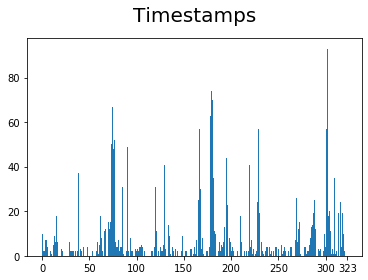

In [138]:
## Don't forget to save tho
plt.hist(timestamps,range(0,323))
plt.xticks([0,50,100,150,200,250,300,323])
plt.title("Timestamps",fontsize=20,y=1.05)
plt.savefig("timestamps.pdf",format="pdf",bbox_inches = "tight")
_=plt.show()

### Problem 4

In [147]:
# Number of tables and table names
con=sqlite3.connect("Chinook_Sqlite.sqlite")
c=con.cursor()
table_names=[i[0] for i in c.execute("select name from sqlite_master where type='table'")]
n_tables=len(table_names)
n_tables
table_names

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

In [148]:
# Create a function
## single character??? 
## list expression
def list_album_ids_by_letter(s):
    s=s.lower()
    if not len(s)==1:
        raise ValueError("The input should be a single character!")
    if not s in string.ascii_lowercase: 
        raise TypeError("The input should be a single character!")
    s=s+"%"
    title_list=[i[0] for i in c.execute("select AlbumID from Album where Title like ?",[s])]
    return title_list
list_album_ids_by_letter("z")

[240]

In [149]:
# Create another function
def list_song_ids_by_album_letter(s):
    s=s.lower()
    if not len(s)==1:
        raise ValueError("The input should be a single character!")
    if not s in string.ascii_lowercase: 
        raise TypeError("The input should be a single character!")
    s=s+"%"
    song_list=[i[0] for i in c.execute("select TrackID from Album inner join Track on Album.AlbumID=Track.AlbumID where Title like ?",[s])]
    return song_list

list_song_ids_by_album_letter("z")
#for i in c.execute("select * from sqlite_master"): print(i)
#for i in c.execute("select Name from Album inner join Track on Album.AlbumID=Track.AlbumID where Title like ?",["a%"]):
#    print(i)

[3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037]

In [150]:
def total_cost_by_album_letter(s):
    s=s.upper()
    if not len(s)==1:
        raise ValueError("The input should be a single character!")
    if not s in string.ascii_uppercase: 
        raise ValueError("The input should be a single character!")
    s=s+"%"
    v=c.execute("select SUM(UnitPrice) from Album inner join Track on Album.AlbumID=Track.AlbumID where Title like ?",[s])
    return list(v)[0][0]
total_cost_by_album_letter("c")
    

255.42000000000087

In [154]:
con.close()
#for i in c.execute("select UnitPrice from Album inner join Track on Album.AlbumID=Track.AlbumID where Title like ?",["z%"]):
 #   print(i)


    
  